**Source Code Reference:**
- Author: Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Research University

In [2]:
%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

### Data Preparation

In [3]:
# Create artificial dataset (classification problem within 2 classes within R^2 input space)
# The input data is represented in a 2-dimensional space (R²), where each data point has two features (x and y coordinates).
Xmoon, y_moon = make_moons(n_samples=900, noise=0.2, random_state=0)

# Preprocess dataset, and split into training and test part
Xmoon = StandardScaler().fit_transform(Xmoon)
Xmoon_train, Xmoon_test, y_moon_train, y_moon_test = train_test_split(Xmoon, y_moon, test_size=0.7)


# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Ymoon_train_OneHot = np.eye(2)[y_moon_train]
Ymoon_test_OneHot = np.eye(2)[y_moon_test]

In [4]:
# Print beginning of training dataset (for verification)
print("Number of training examples = ", y_moon_train.size)
print()
print("  first ", round(y_moon_train.size/10), "training examples" )
print("[  Input_features  ]     [Target_output]")
for i in range( int(round(y_moon_train.size/10) )):
    print( Xmoon_train[i], Ymoon_train_OneHot[i])

Number of training examples =  270

  first  27 training examples
[  Input_features  ]     [Target_output]
[ 0.61254804 -0.41750748] [1. 0.]
[ 1.80850235 -0.43060223] [0. 1.]
[ 1.01983008 -1.48064437] [0. 1.]
[-1.13349809  1.74976563] [1. 0.]
[ 1.58051502 -0.02467647] [0. 1.]
[-0.86938517  1.59812225] [1. 0.]
[ 0.13110225 -1.08087848] [0. 1.]
[ 0.73053125 -1.33542615] [0. 1.]
[-0.26268237  1.5997144 ] [1. 0.]
[-1.49755193  0.20277328] [1. 0.]
[ 1.86065798 -0.80794955] [0. 1.]
[ 0.23578993 -1.03143605] [0. 1.]
[0.87373088 0.27086647] [1. 0.]
[-2.01223541 -0.62344788] [1. 0.]
[ 1.45350223 -0.59430067] [0. 1.]
[-1.64777863  0.0535094 ] [1. 0.]
[-1.18297529  1.22277959] [1. 0.]
[-1.97479041  0.24768686] [1. 0.]
[-1.14071422  1.660253  ] [1. 0.]
[0.60003094 0.06196611] [1. 0.]
[-0.53864     1.43544347] [1. 0.]
[-0.36457303  1.36333881] [1. 0.]
[-0.55583367  1.03732995] [1. 0.]
[-1.49609137  0.86983197] [1. 0.]
[1.83233033 0.15153871] [0. 1.]
[ 1.59710867 -0.92380694] [0. 1.]
[-1.71731204  0

### Data Plotting


PLOT OF TRAINING EXAMPLES AND TEST DATASET
Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]


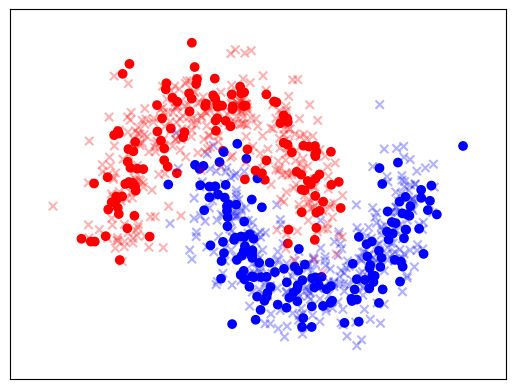

In [5]:
# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points...
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
#   ...and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Define limits/scale of plot axis
x_min, x_max = Xmoon[:, 0].min() - .5, Xmoon[:, 0].max() + .5
y_min, y_max = Xmoon[:, 1].min() - .5, Xmoon[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

# Actually render the plot
print()
print("PLOT OF TRAINING EXAMPLES AND TEST DATASET")
print("Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]")

plt.ioff()
plt.show()

### Building, training and evaluating a simple Neural Network classifier (Multi Layer Perceptron, MLP)

The SciKit-learn class for MLP is MLPClassifier. Please first read the [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifierMLPClassifier) documentation; to understand all parameters of the constructor. You can then begin by running the code block below, in which an initial set of hyper-parameter values has been chosen. YOU MAY NEED TO CHANGE AT LEAST THE NUMBER OF HIDDEN NEURONS (and probably other hyper-parameters) IN ORDER TO BE ABLE TO LEARN A CORRECT CLASSIFIER

In [6]:
from sklearn.neural_network import MLPClassifier

# Create the MLP (with specific values for hyper-parameters)
mlp = MLPClassifier(hidden_layer_sizes=(1, ), activation='tanh', solver='sgd', 
                    alpha=0.0000001, batch_size=4, learning_rate='constant', learning_rate_init=0.005, 
                    power_t=0.5, max_iter=9, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(mlp)
# NB about syntax for hidden layers: hidden_layer_sizes=(H1, ) means ONE hidden layer containing H1 neurons,
# while hidden_layer_sizes=(H1,H2, ) would mean TWO hidden layers of respective sizes H1 and H2
# NB about iteration: max_iter specifies a number of EPOCHS (= going through all training examples)

MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4,
              hidden_layer_sizes=(1,), learning_rate_init=0.005, max_iter=9,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)


In [7]:
# Train the MLP classifier on the training dataset
mlp.fit(Xmoon_train, Ymoon_train_OneHot)


Iteration 1, loss = 1.69203224
Iteration 2, loss = 1.49049864
Iteration 3, loss = 1.39477798
Iteration 4, loss = 1.32856277
Iteration 5, loss = 1.25763977
Iteration 6, loss = 1.16644537
Iteration 7, loss = 1.05216180
Iteration 8, loss = 0.93124272
Iteration 9, loss = 0.84133026


/usr/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (9) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4,
              hidden_layer_sizes=(1,), learning_rate_init=0.005, max_iter=9,
              momentum=0.8, random_state=11, solver='sgd', tol=1e-05,
              validation_fraction=0.2, verbose=True)

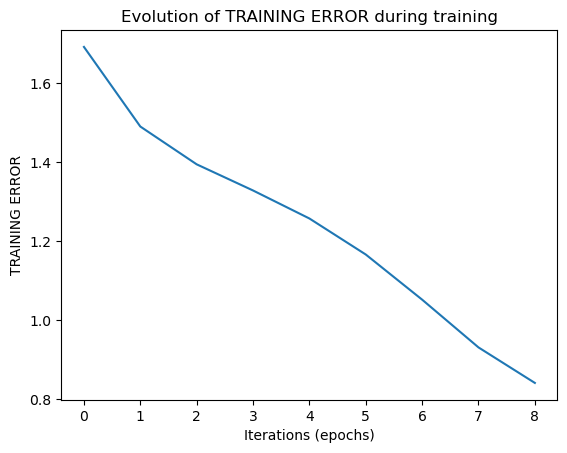

In [8]:
# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(mlp.loss_curve_)
plt.show()

In [9]:
# Evaluate acuracy on TEST data
score = mlp.score(Xmoon_test,Ymoon_test_OneHot)
print("Acuracy (on test set) = ", score)

Acuracy (on test set) =  0.8476190476190476


### Visualize the learnt boundary between classes in (2D) input space

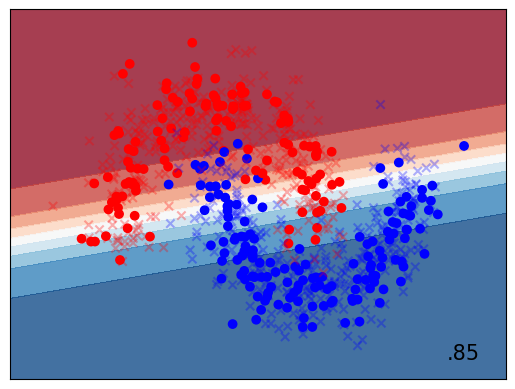

In [10]:
# Plot the decision boundary. For that, we will assign a color to each
#   point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Compute class probabilities for each mesh point
Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(Xmoon_train[:, 0], Xmoon_train[:, 1], c=y_moon_train, cmap=cm_bright)
# and testing points
plt.scatter(Xmoon_test[:, 0], Xmoon_test[:, 1], marker='x', c=y_moon_test, cmap=cm_bright, alpha=0.3)

# Axis ranges 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Print acuracy on plot
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

# Actually plot
plt.ioff()
plt.show()

### Fine Tuning
- number of neurons on hidden layer: if very small, the classification boundary shall be too simple; if too large, overfitting might occur more easily. NB: generally, only ONE hidden layer is sufficient (cf. Cybenko theorem); using more than one may require using ReLU as activation function, to avoid gradient "vanishing".
- activation functions
- number of iterations: if too small, the training does not finish to converge; if too large, overfitting may occur. NB: it is therefore usually better to use "early_stopping" with quite large max_iter, so that the actual number of iterations shall adapt by STOPPING WHEN VALIDATION ERROR STOPS DECREASING
- solver (the best choice is generally 'adam'; for more details, see https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)
- learning_rate and momentum: the initial learning rate ALWAYS impacts training outcome a lot (too small may stuck training in bad local minimum; too large can induce strong error fluctuations and possibly no convergence)
impact of L2 weight regularization term (alpha)

### learning hyper-parameters
we will use grid-search and cross-validation to find an optimized set of learning hyper-parameters

Because the values of learning hyper-parameters can DRASTICALLY change the outcome of training, it is ESSENTIAL THAT YOU ALWAYS TRY TO FIND OPTIMIZED VALUES FOR THE ALGORITHM HYPER-PARAMETERS. And this ABSOLUTELY NEEDS TO BE DONE USING "VALIDATION", either with a validation set separate from the training set, or using cross-validation. CROSS-VALIDATION is the MOST ROBUST WAY OF FINDING OPTIMIZED HYPER-PARAMETRS VALUES, and the GridSearchCV function of SciKit-Learn makes this rather straightforward.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

param_grid = [
  {'hidden_layer_sizes': [(5,), (10,), (20,), (40,)], 
   'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
   'alpha': [0.00001, 0.0001, 0.001]}
 ]
print(param_grid)

# Cross-validation grid-search (for finding best possible accuracy)
clf = GridSearchCV( MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
                                  beta_2=0.999, early_stopping=True, epsilon=1e-08,
                                  hidden_layer_sizes=(10,), learning_rate='constant',
                                  learning_rate_init=0.005, max_iter=500, momentum=0.8,
                                  nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
                                  solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
                                  warm_start=False), 
                   param_grid, cv=3, scoring='accuracy') 
# NOTE THAT YOU CAN USE OTHER VALUE FOR cv (# of folds) and OTHER SCORING CRITERIA OTHER THAN 'accuracy'
    
clf.fit(Xmoon_train, Ymoon_train_OneHot)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = Ymoon_test_OneHot, clf.predict(Xmoon_test)
print(classification_report(y_true, y_pred))
print()

[{'hidden_layer_sizes': [(5,), (10,), (20,), (40,)], 'learning_rate_init': [0.003, 0.01, 0.03, 0.1], 'alpha': [1e-05, 0.0001, 0.001]}]
Best parameters set found on development set:

{'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.1}

Grid scores on development set:

0.815 (+/-0.052) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.003}
0.852 (+/-0.010) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01}
0.844 (+/-0.031) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.03}
0.956 (+/-0.048) for {'alpha': 1e-05, 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.1}
0.789 (+/-0.144) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.003}
0.822 (+/-0.179) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.01}
0.948 (+/-0.021) for {'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.03}
0.926 (+/-0.010) for {'alpha': 1e-05, 'hidden_laye